<a href="https://colab.research.google.com/github/koriatul/pytn-ks-011/blob/main/Sesi__12___Classification_I_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1> Classification <h1>

<h2> Logistic Regression <h2>

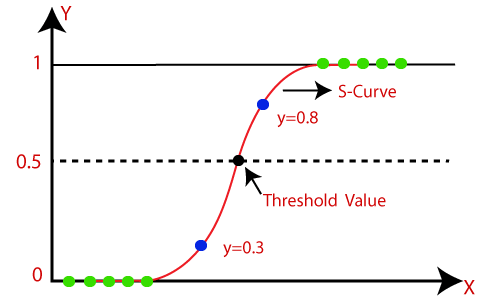

In [1]:
from PIL import Image
img = Image.open('/content/drive/MyDrive/Colab Notebooks/sesi12_classification /1.png')
img.show()

<h2> Evaluation Metrics <h2>

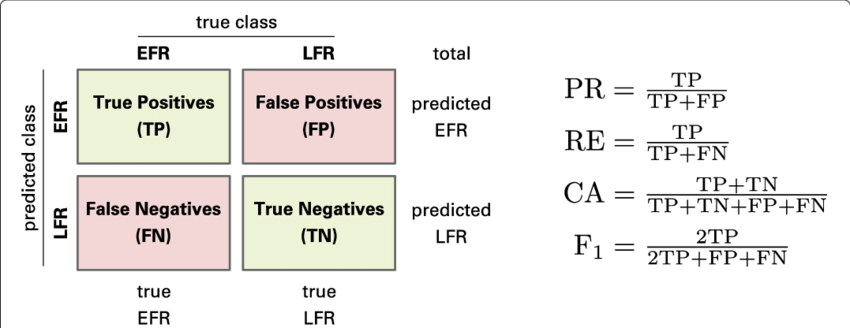

In [2]:
img = Image.open('/content/drive/MyDrive/Colab Notebooks/sesi12_classification /2.png')
img.show()

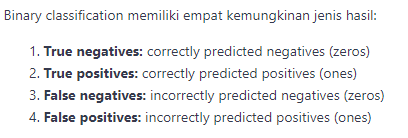

In [3]:
img = Image.open('/content/drive/MyDrive/Colab Notebooks/sesi12_classification /3.png')
img.show()

kelas = 1 dan 0

1 itu spam

0 bukan spam

True Positive = Predicted Spam dan Aktual Spam

False Positive = Prediksi Spam dan Aktual bukan Spam

True Negative = Prediksi Bukan Spam dan Aktual Bukan Spam

False Negative = Prediksi Bukan Spam ternyata Aktual Spam

Metrics:

Akurasi = (True Positive + True Negative) / Jumlah Keseluruhan Data

<h3> Import Libraries <h3>

In [4]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix

In [5]:
x = np.arange(10).reshape(-1,1)
y = np.array([0,0,0,0,1,1,1,1,1,1])

In [6]:
model = LogisticRegression(solver='liblinear',random_state=0)

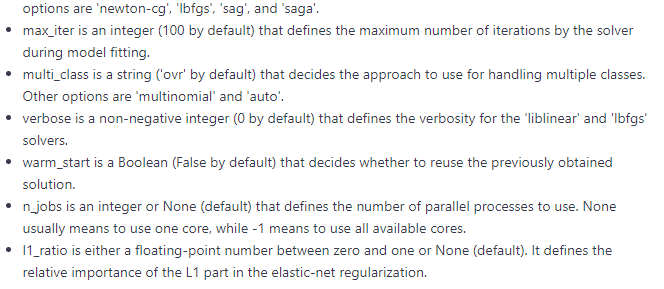

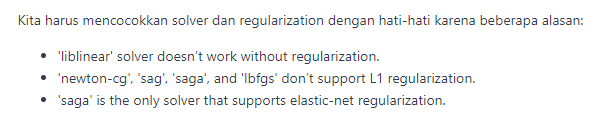

In [7]:
img = Image.open('/content/drive/MyDrive/Colab Notebooks/sesi12_classification /4.png')
img.show() 
img = Image.open('/content/drive/MyDrive/Colab Notebooks/sesi12_classification /5.png')
img.show()

In [8]:
model.fit(x,y)

LogisticRegression(random_state=0, solver='liblinear')

In [9]:
model.classes_

array([0, 1])

Model diatas memiliki binary class

In [10]:
print(model.intercept_,model.coef_)

[-1.04608067] [[0.51491375]]


In [11]:
model.predict_proba(x)

array([[0.74002157, 0.25997843],
       [0.62975524, 0.37024476],
       [0.5040632 , 0.4959368 ],
       [0.37785549, 0.62214451],
       [0.26628093, 0.73371907],
       [0.17821501, 0.82178499],
       [0.11472079, 0.88527921],
       [0.07186982, 0.92813018],
       [0.04422513, 0.95577487],
       [0.02690569, 0.97309431]])

In [12]:
model.predict_proba(x)[:,1]

array([0.25997843, 0.37024476, 0.4959368 , 0.62214451, 0.73371907,
       0.82178499, 0.88527921, 0.92813018, 0.95577487, 0.97309431])

In [13]:
y

array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])

In [14]:
model.predict(x)

array([0, 0, 0, 1, 1, 1, 1, 1, 1, 1])

In [15]:
model.score(x,y)

0.9

In [16]:
y_pred = model.predict(x)

In [17]:
confusion_matrix(y, y_pred)

array([[3, 1],
       [0, 6]])

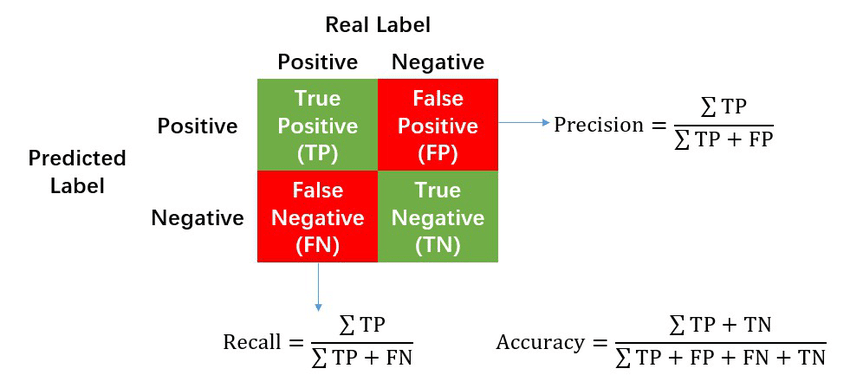

In [18]:
img = Image.open('/content/drive/MyDrive/Colab Notebooks/sesi12_classification /6.png')
img.show()

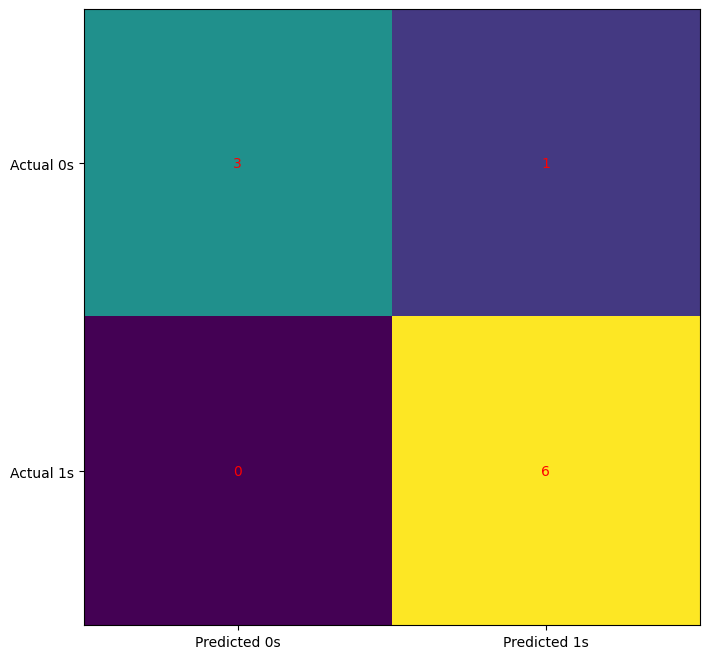

In [19]:
cm = confusion_matrix(y,y_pred)

fig, ax = plt.subplots(figsize=(8,8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0,1),ticklabels = ('Predicted 0s','Predicted 1s'))
ax.yaxis.set(ticks=(0,1),ticklabels = ('Actual 0s','Actual 1s'))
ax.set_ylim(1.5,-0.5)
for i in range(2):
    for j in range(2):
        ax.text(j,i,cm[i,j],ha='center',va='center',color='red')
plt.show()

Perhitungan Manual

In [20]:
TP = 6
FP = 1
FN = 0
TN = 3

acc = (TP+TN)/(TP+FP+TN+FN)
pre = (TP) / (TP+FP)
re = (TP)/ (TP+FN)
f1 = (TP+TP) / (TP+TP+FP+FN)
print(acc)
print(pre)
print(re)
print(f1)

0.9
0.8571428571428571
1.0
0.9230769230769231


In [21]:
print(classification_report(y, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.75      0.86         4
           1       0.86      1.00      0.92         6

    accuracy                           0.90        10
   macro avg       0.93      0.88      0.89        10
weighted avg       0.91      0.90      0.90        10



<h2> Model Improvment <h2>

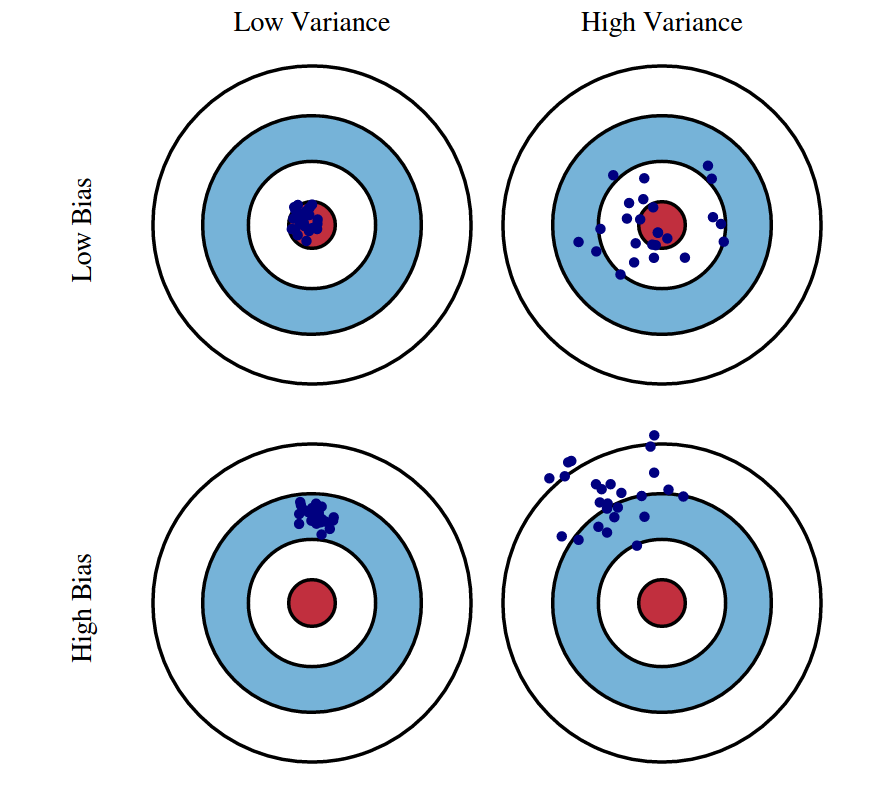

In [22]:
img = Image.open('/content/drive/MyDrive/Colab Notebooks/sesi12_classification /7.png')
img.show()

In [27]:
model_tuned = LogisticRegression(solver='liblinear', C= 10.0 ,random_state=0)
model_tuned.fit(x,y)

LogisticRegression(C=10.0, random_state=0, solver='liblinear')

In [28]:
y

array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])

In [29]:
y_pred_tuned = model_tuned.predict(x)

In [30]:
confusion_matrix(y,y_pred_tuned)

array([[4, 0],
       [0, 6]])

In [31]:
print(classification_report(y,y_pred_tuned))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      1.00      1.00         6

    accuracy                           1.00        10
   macro avg       1.00      1.00      1.00        10
weighted avg       1.00      1.00      1.00        10



<h1> Logistic Regression For Handwriting Recognition <h1>

In [32]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_digits
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report , confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [33]:
x,y  = load_digits(return_X_y=True)

In [34]:
print(x,'\n',y)

[[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  0.  1. ...  6.  0.  0.]
 [ 0.  0.  2. ... 12.  0.  0.]
 [ 0.  0. 10. ... 12.  1.  0.]] 
 [0 1 2 ... 8 9 8]


In [35]:
x_train, x_test, y_train,y_test = train_test_split(x,y,test_size=0.25, random_state=2024)

In [36]:
x_train

array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  9.,  0.,  0.],
       [ 0.,  1., 11., ..., 10.,  0.,  0.],
       ...,
       [ 0.,  0.,  5., ..., 16.,  2.,  0.],
       [ 0.,  1., 13., ..., 12.,  5.,  0.],
       [ 0.,  0.,  9., ...,  1.,  0.,  0.]])

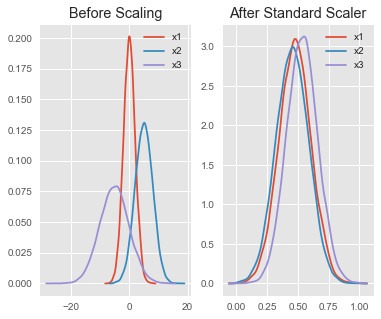

In [38]:
from PIL import Image 
img = Image.open('/content/drive/MyDrive/Colab Notebooks/sesi12_classification /8.png')
img.show()

In [39]:
scaler = StandardScaler()
x_train  = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [40]:
model = LogisticRegression(solver='liblinear',C=0.05,multi_class='ovr',random_state=2024)
model.fit(x_train,y_train)

LogisticRegression(C=0.05, multi_class='ovr', random_state=2024,
                   solver='liblinear')

In [41]:
model.score(x_train,y_train)

0.9680772086117297

In [42]:
model.score(x_test,y_test)

0.9444444444444444

In [43]:
y_pred_train = model.predict(x_train)
y_pred_test = model.predict(x_test)

In [44]:
from sklearn.metrics import ConfusionMatrixDisplay

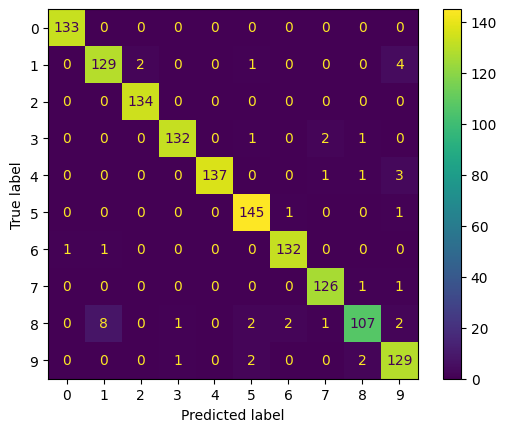

In [46]:
cm = confusion_matrix(y_train,y_pred_train)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

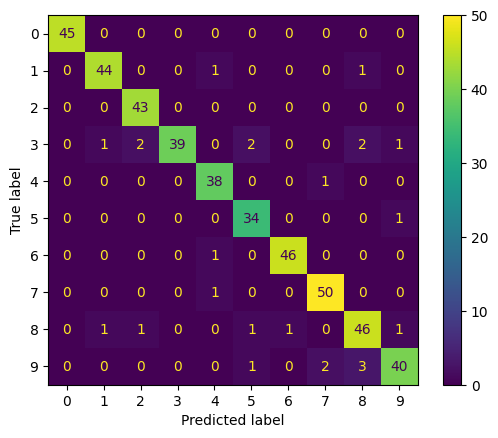

In [48]:
cm = confusion_matrix(y_test,y_pred_test)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

In [49]:
print('Train Set')
print(classification_report(y_train,y_pred_train))
print('Test Set')
print(classification_report(y_test,y_pred_test))

Train Set
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       133
           1       0.93      0.95      0.94       136
           2       0.99      1.00      0.99       134
           3       0.99      0.97      0.98       136
           4       1.00      0.96      0.98       142
           5       0.96      0.99      0.97       147
           6       0.98      0.99      0.98       134
           7       0.97      0.98      0.98       128
           8       0.96      0.87      0.91       123
           9       0.92      0.96      0.94       134

    accuracy                           0.97      1347
   macro avg       0.97      0.97      0.97      1347
weighted avg       0.97      0.97      0.97      1347

Test Set
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        45
           1       0.96      0.96      0.96        46
           2       0.93      1.00      0.97        43
     

<h2> Parametric vs Non Parametric Models <h2>

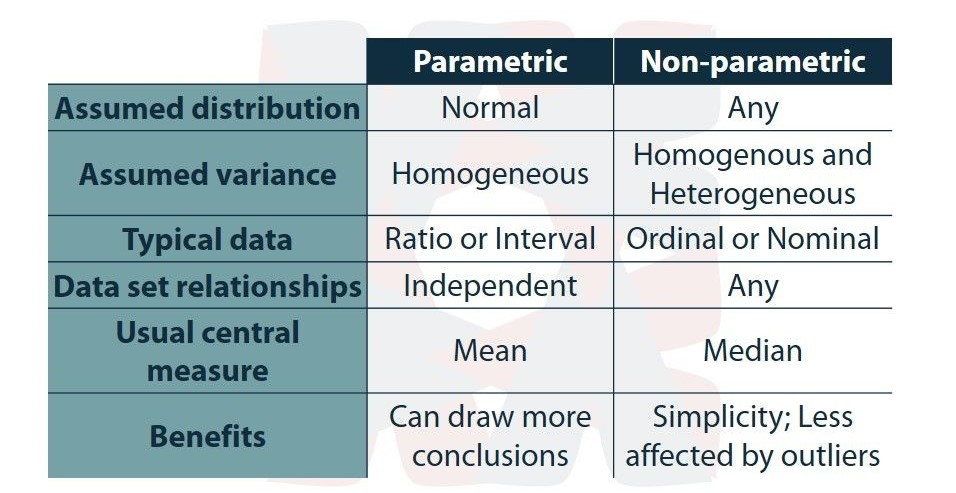

In [52]:
img = Image.open('/content/drive/MyDrive/Colab Notebooks/sesi12_classification /9.png')
img.show()

<h2> K-Nearest Neighbour <h2>

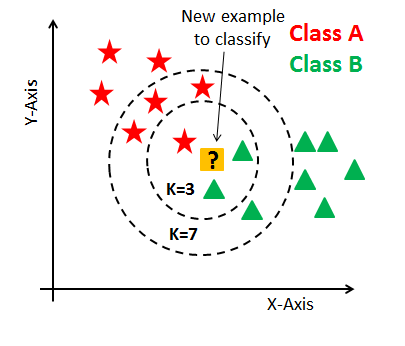

In [53]:
img = Image.open('/content/drive/MyDrive/Colab Notebooks/sesi12_classification /10.png')
img.show()

In [54]:
#Feature 1
weather = ['Sunny','Sunny','Overcast','Rainy','Rainy','Rainy','Overcast','Sunny','Sunny','Rainy',
          'Sunny','Overcast','Overcast','Rainy']
# Feature 2
temp = ['Hot','Hot','Hot','Mild','Cool','Cool','Cool','Mild','Cool',
       'Mild','Mild','Mild','Hot','Mild']

# Label atau target
play = ['No','No','Yes','Yes','Yes','No','Yes','No','Yes','Yes','Yes','Yes','Yes','No']

print(len(weather),len(temp),len(play))

14 14 14


weather = Sunny:2, Rainy:1, Overcast: 0

temp = Mild :2 , Hot: 1 , Cool:0

In [55]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
weather_enc = le.fit_transform(weather) #var 1
temp_enc = le.fit_transform(temp) #var 2
play_enc = le.fit_transform(play) #var target
print(weather_enc)
print(temp_enc)
print(play_enc)

[2 2 0 1 1 1 0 2 2 1 2 0 0 1]
[1 1 1 2 0 0 0 2 0 2 2 2 1 2]
[0 0 1 1 1 0 1 0 1 1 1 1 1 0]


In [56]:
features = list(zip(weather_enc,temp_enc))
features

[(2, 1),
 (2, 1),
 (0, 1),
 (1, 2),
 (1, 0),
 (1, 0),
 (0, 0),
 (2, 2),
 (2, 0),
 (1, 2),
 (2, 2),
 (0, 2),
 (0, 1),
 (1, 2)]

In [57]:
from sklearn.neighbors import KNeighborsClassifier
x = features
y  = play_enc
model = KNeighborsClassifier(n_neighbors=3) #n_neighbors adalah jumlah k

model.fit(x,y)

KNeighborsClassifier(n_neighbors=3)

weather = Sunny:2, Rainy:1, Overcast: 0

temp = Mild :2 , Hot: 1 , Cool:0

play = Yes:1 , No:0

Ketika kondisi Overcast dan Temperature Mild akan Play atau tidak?

In [59]:
predicted = model.predict([[1,1]])
print(predicted)

[0]


In [61]:
y_pred = model.predict(x)

In [62]:
print(classification_report(y,y_pred))

              precision    recall  f1-score   support

           0       0.60      0.60      0.60         5
           1       0.78      0.78      0.78         9

    accuracy                           0.71        14
   macro avg       0.69      0.69      0.69        14
weighted avg       0.71      0.71      0.71        14



<h2> KNN with Multiple Labels (Multiclass) <h2>

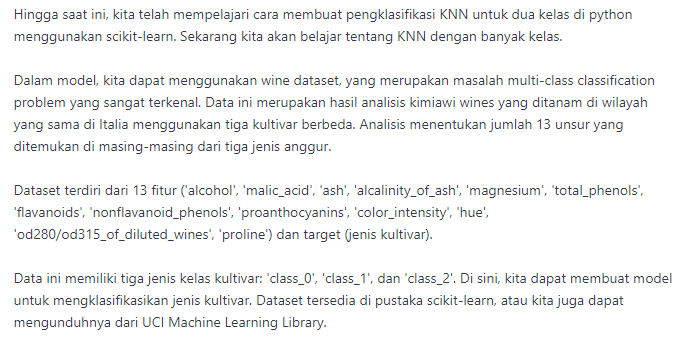

In [63]:
img = Image.open('/content/drive/MyDrive/Colab Notebooks/sesi12_classification /11.png')
img.show()

In [65]:
from sklearn .datasets import load_wine

In [66]:
wine = load_wine()

In [67]:
wine['feature_names']

['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']

In [68]:
wine['target_names']

array(['class_0', 'class_1', 'class_2'], dtype='<U7')

In [69]:
wine['data']

array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
        1.065e+03],
       [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
        1.050e+03],
       [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
        1.185e+03],
       ...,
       [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
        8.350e+02],
       [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
        8.400e+02],
       [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
        5.600e+02]])

In [70]:
wine['target']

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [71]:
wine['data'].shape

(178, 13)

In [72]:
wine['target'].shape

(178,)

In [73]:
import pandas as pd

In [74]:
x = pd.DataFrame(wine['data'],columns=wine['feature_names'])
x

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0


In [75]:
y = pd.DataFrame(wine['target'],columns=['kultivar'])
y

,kultivar
0,0
1,0
2,0
3,0
4,0
...,...
173,2
174,2
175,2
176,2


In [76]:
X_train , X_test , y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=2024)

Coba K=5

In [77]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train)

y_pred = knn.predict(X_test)

/usr/local/lib/python3.9/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [78]:
from sklearn.metrics import accuracy_score

print('Accuracy :', accuracy_score(y_test,y_pred))

Accuracy : 0.6481481481481481


In [79]:
knn_7 = KNeighborsClassifier(n_neighbors=7)
knn_7.fit(X_train,y_train)

y_pred_7 = knn.predict(X_test)

/usr/local/lib/python3.9/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [80]:
from sklearn.metrics import accuracy_score

print('Accuracy :', accuracy_score(y_test,y_pred_7))

Accuracy : 0.6481481481481481


In [81]:
y_pred

array([2, 0, 2, 0, 2, 2, 2, 1, 2, 0, 0, 2, 2, 0, 1, 1, 0, 2, 2, 2, 0, 1,
       1, 1, 1, 1, 1, 0, 2, 1, 2, 0, 0, 1, 2, 2, 2, 2, 0, 0, 1, 1, 2, 1,
       2, 2, 0, 1, 1, 2, 0, 0, 1, 1])

In [82]:
error = []

# kalkulasi eror untuk k_values between 1 dan 40

for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i !=y_test['kultivar']))

/usr/local/lib/python3.9/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.9/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.9/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.9/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for exam

Text(0, 0.5, 'Error Rate')

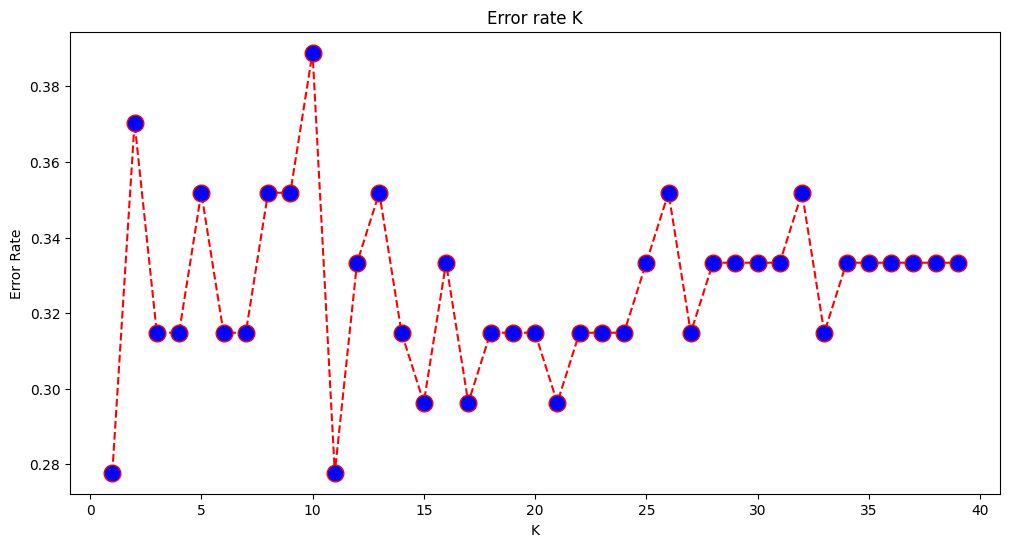

In [83]:
plt.figure(figsize=(12,6))
plt.plot(range(1,40),error, color='red',linestyle='dashed',marker='o', markerfacecolor='blue',markersize=12)
plt.title('Error rate K')
plt.xlabel('K')
plt.ylabel('Error Rate')

error terkecil yang kita  didapatkan adalah 0,21 pada K =25

In [84]:
knn_11 = KNeighborsClassifier(n_neighbors=11)
knn_11.fit(X_train,y_train)

y_pred_11 = knn_11.predict(X_test)

print('Accuracy:', accuracy_score(y_test,y_pred_11) )

Accuracy: 0.7222222222222222


/usr/local/lib/python3.9/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [85]:
scaler = StandardScaler()

In [86]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [87]:
knn_11 = KNeighborsClassifier(n_neighbors=11)
knn_11.fit(X_train_scaled,y_train)
y_pred_11_scaled = knn_11.predict(X_test_scaled)
print('Accuracy:', accuracy_score(y_test,y_pred_11_scaled) )

Accuracy: 0.9814814814814815


/usr/local/lib/python3.9/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [88]:
y_pred_train = knn_11.predict(X_train_scaled)
y_pred_test = knn_11.predict(X_test_scaled)

In [89]:
print('Train Set')
print(classification_report(y_train,y_pred_train))
print('Test Set')
print(classification_report(y_test,y_pred_test))

Train Set
              precision    recall  f1-score   support

           0       0.95      0.98      0.96        41
           1       0.98      0.96      0.97        51
           2       1.00      1.00      1.00        32

    accuracy                           0.98       124
   macro avg       0.98      0.98      0.98       124
weighted avg       0.98      0.98      0.98       124

Test Set
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1       1.00      0.95      0.97        20
           2       0.94      1.00      0.97        16

    accuracy                           0.98        54
   macro avg       0.98      0.98      0.98        54
weighted avg       0.98      0.98      0.98        54

